<a href="https://colab.research.google.com/github/MrBasM/TensorFlow-for-Deep-Learning-Bootcamp/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit


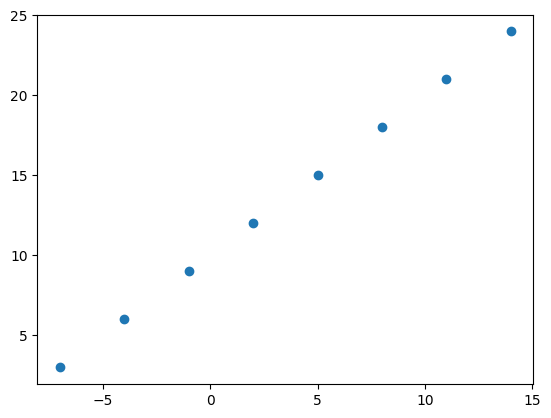

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [ ]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn out NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

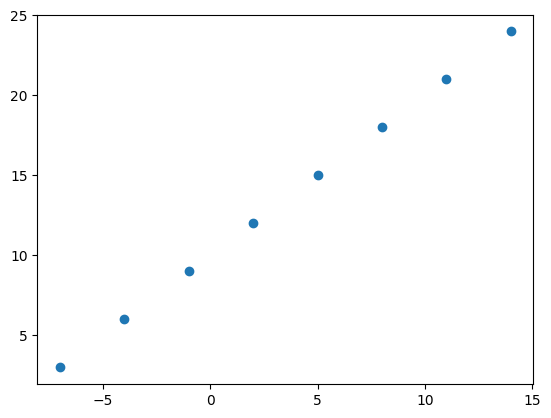

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mea is short for mean obsolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.5396 - mae: 8.5396
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - loss: 8.4071 - mae: 8.4071
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - loss: 8.2746 - mae: 8.2746
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - loss: 8.1421 - mae: 8.1421
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 8.0096 - mae: 8.0096


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[27.118507]], dtype=float32)

In [ ]:
y_pred + 11

array([[38.118507]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Comling a model** - here we migth change the optimization function or perhaps the **learning rate** of the optimization.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mea is short for mean obsolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model (this time we'll train longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17.7019 - mae: 17.7019
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 17.4207 - mae: 17.4207
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - loss: 17.1394 - mae: 17.1394
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 16.8582 - mae: 16.8582
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - loss: 16.5769 - mae: 16.5769
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 16.2957 - mae: 16.2957
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 16.0144 - mae: 16.0144
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 15.7332 - mae: 15.7332
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 15.4519 - mae: 15.4519
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 15.1707 - mae: 15.1707
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 14.8894 - mae: 14.8894
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 14.6975 - mae: 14.6975
Epoch 13/100
1/1

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[29.785227]], dtype=float32)

In [ ]:
# Let's see if we can make anther to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", # mea is short for mean obsolute error
              #optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["mae"])

# 3. Fit the model (this time we'll train longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.7869 - mae: 12.7869
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 10.8902 - mae: 10.8902
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.9330 - mae: 8.9330
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.8730 - mae: 6.8730
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.8281 - mae: 7.8281
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5424 - mae: 8.5424
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.2958 - mae: 8.2958
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.4959 - mae: 7.4959
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 6.5346 - mae: 6.5346
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.9132 - mae: 5.9132
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.0469 - mae: 6.0469
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.1930 - mae: 6.1930
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/s

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[27.721348]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```


When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

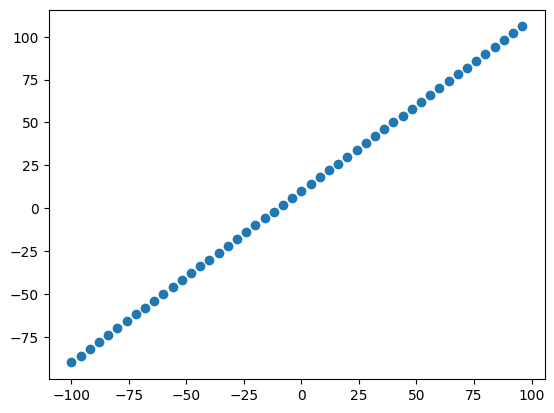

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y);

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the mode gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.




In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data split into training and test sets, let's visualize it.

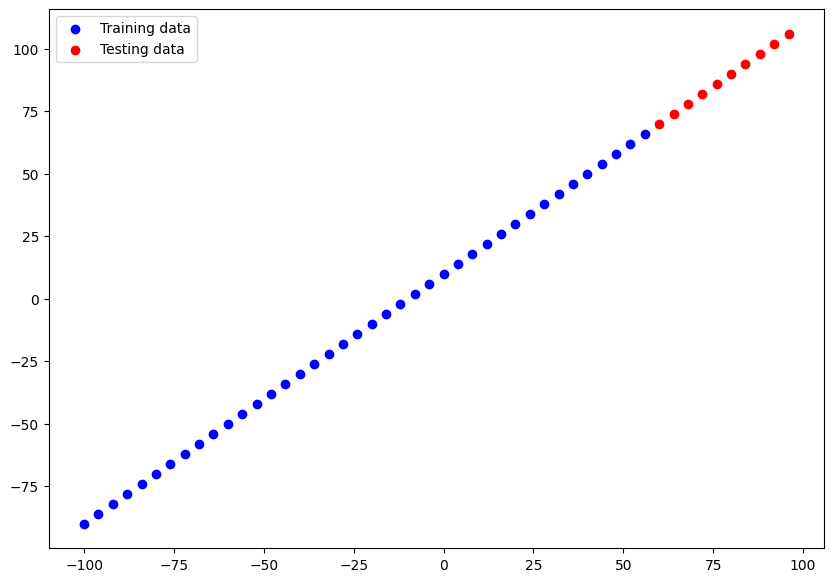

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot the test data in green
plt.scatter(X_test, y_test, c="r", label="Testing data")
# Show the legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_one")

# 2. Compile the model (same as above)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              #optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "model_one"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠️ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary`. ✅

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 50.0665 - mae: 50.0665 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 44.4256 - mae: 44.4256
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 38.8972 - mae: 38.8972
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 33.4349 - mae: 33.4349
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 28.0586 - mae: 28.0586
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 22.7480 - mae: 22.7480
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.5734 - mae: 17.5734
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.6376 - mae: 12.6376
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.7520 - mae: 8.7520
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.9295 - mae: 8.9295
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.6495 - mae: 10.6495
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.5568 - mae: 11.5568
Epoch 13/100
2/2 ━━━━━━━━━━━

In [ ]:
model.summary()

Model: "model_one"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

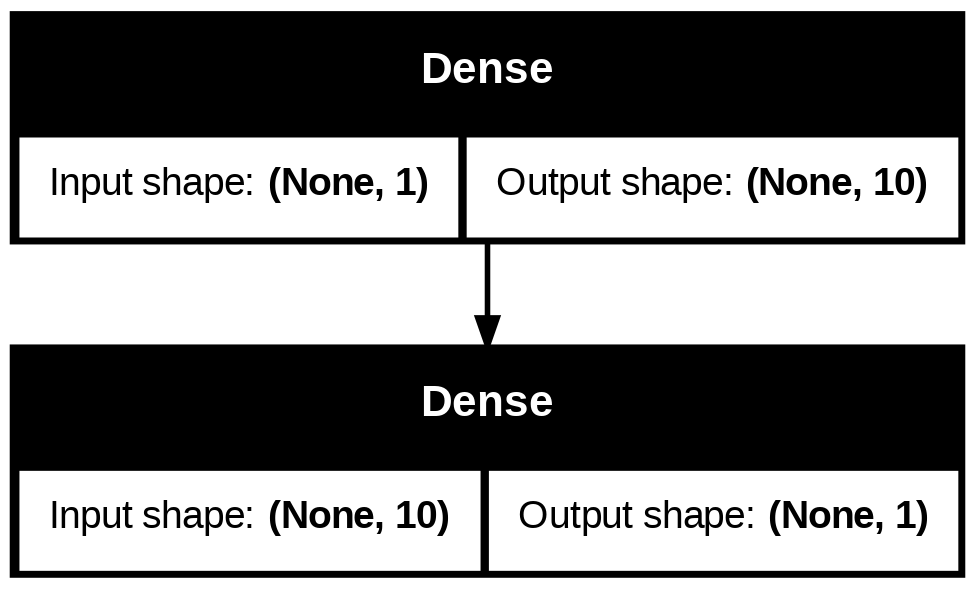

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels. Often you'll see this in the form of `y_test` or `y_true` verus `y_pred` (ground truth versus you model predictions).

In [ ]:
# Make some predictions
y_preds = model.predict(tf.expand_dims(X_test, axis=-1))
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[ 71.14932 ],
       [ 75.234924],
       [ 79.320526],
       [ 83.40612 ],
       [ 87.491714],
       [ 91.57732 ],
       [ 95.66292 ],
       [ 99.74851 ],
       [103.83412 ],
       [107.91972 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

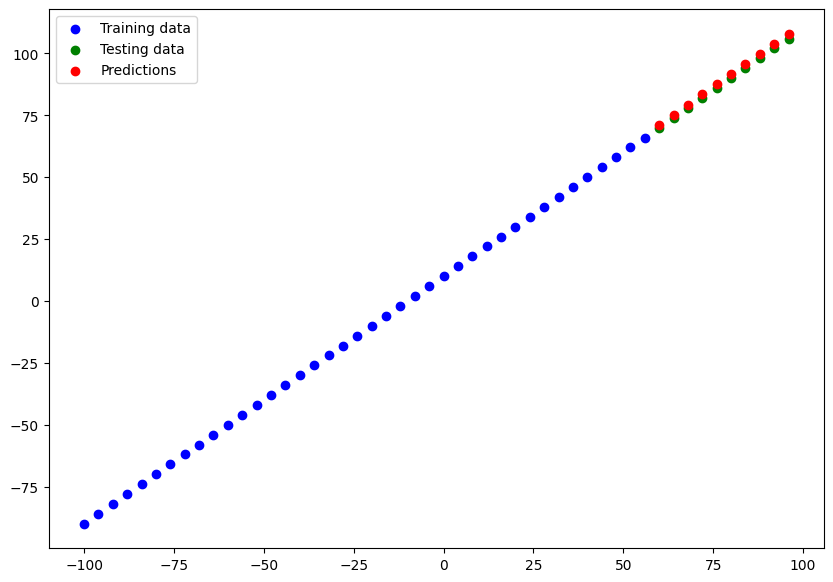

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

# Call the function
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evalution metrics to evaluate your model's performance.

Since we're working on a regression , two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model' predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the mode on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 1.5345 - mae: 1.5345


[1.534519910812378, 1.534519910812378]

In [ ]:
# Calculate the mean absolute error
tf.metrics.mae(y_true=y_test,
              y_pred=tf.constant(y_preds))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.1493225, 1.2349243, 1.3205261, 1.4061203, 1.4917145, 1.5773163,
       1.6629181, 1.7485123, 1.8341217, 1.9197235], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 71.14932 ],
       [ 75.234924],
       [ 79.320526],
       [ 83.40612 ],
       [ 87.491714],
       [ 91.57732 ],
       [ 95.66292 ],
       [ 99.74851 ],
       [103.83412 ],
       [107.91972 ]], dtype=float32)>

In [ ]:
tf.squeeze(tf.constant(y_preds))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.14932 ,  75.234924,  79.320526,  83.40612 ,  87.491714,
        91.57732 ,  95.66292 ,  99.74851 , 103.83412 , 107.91972 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mae(y_true=y_test,
              y_pred=tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.534519910812378>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.4152016639709473>

In [ ]:
huber = tf.keras.losses.Huber()
huber(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=1.034519910812378>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true, tf.squeeze(y_pred)).numpy()


### Running experiments to improve our model

```
build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4` - 1 layer, trained for 100 epochs using the Adam optimizer
5. `model_5` - 2 layer, trained for 500 epochs using the Adam optimizer

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 36.7770 - mae: 36.7770 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.0112 - mae: 8.0112
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.6363 - mae: 9.6363
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.9934 - mae: 7.9934
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.6247 - mae: 9.6247
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.9755 - mae: 7.9755
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.6131 - mae: 9.6131
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.9577 - mae: 7.9577
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.6014 - mae: 9.6014
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.9398 - mae: 7.9398
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.5898 - mae: 9.5898
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.9220 - mae: 7.9220
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


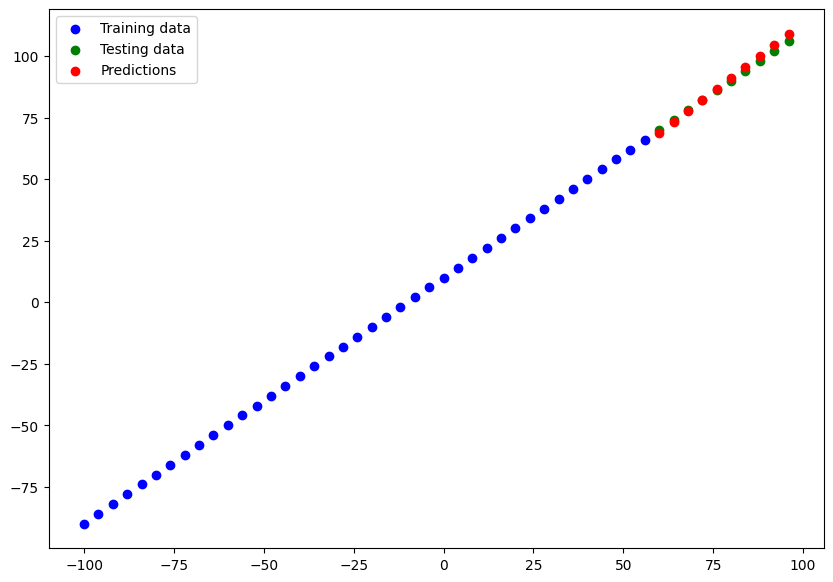

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=tf.squeeze(y_preds_1))

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(np.float32(1.3517182), np.float32(2.6355705))

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 41.4258 - mse: 2452.4661 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 21.9754 - mse: 668.0198
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 21.9754 - mse: 652.0377
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.6309 - mse: 292.4499
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.8543 - mse: 475.0225
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.2199 - mse: 260.0053
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.1868 - mse: 319.4916
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.9347 - mse: 342.6096
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.9326 - mse: 217.5291
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.9118 - mse: 306.4716
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.9754 - mse: 191.6340
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.8026 - mse: 302.2276
Epoch 13/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


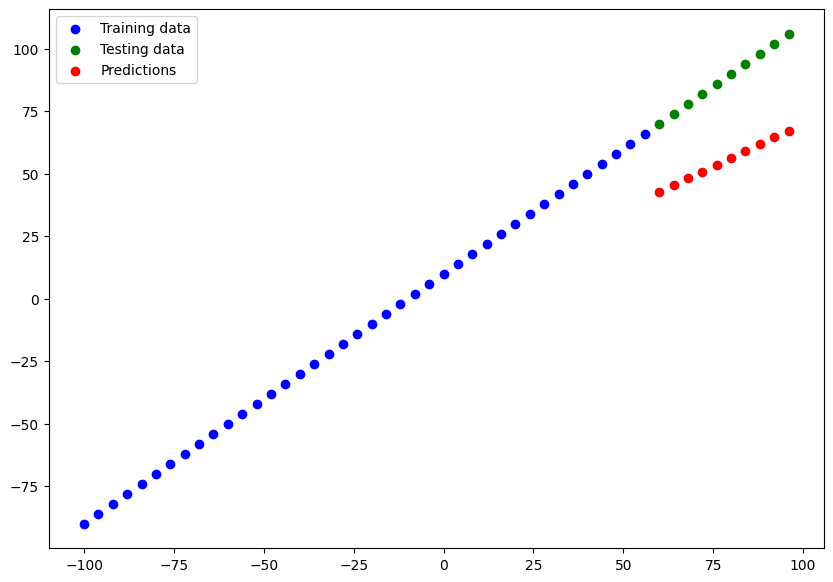

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=tf.squeeze(y_preds_2))

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(np.float32(33.016956), np.float32(1103.3337))

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 58.5218 - mae: 58.5218 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 40.7316 - mae: 40.7316
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 26.8007 - mae: 26.8007
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 24.5912 - mae: 24.5912
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.7314 - mae: 14.7314
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.8336 - mae: 18.8336
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.9409 - mae: 12.9409
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.8630 - mae: 14.8630
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.5395 - mae: 15.5395
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.3103 - mae: 11.3103
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.1703 - mae: 15.1703
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.1651 - mae: 11.1651
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


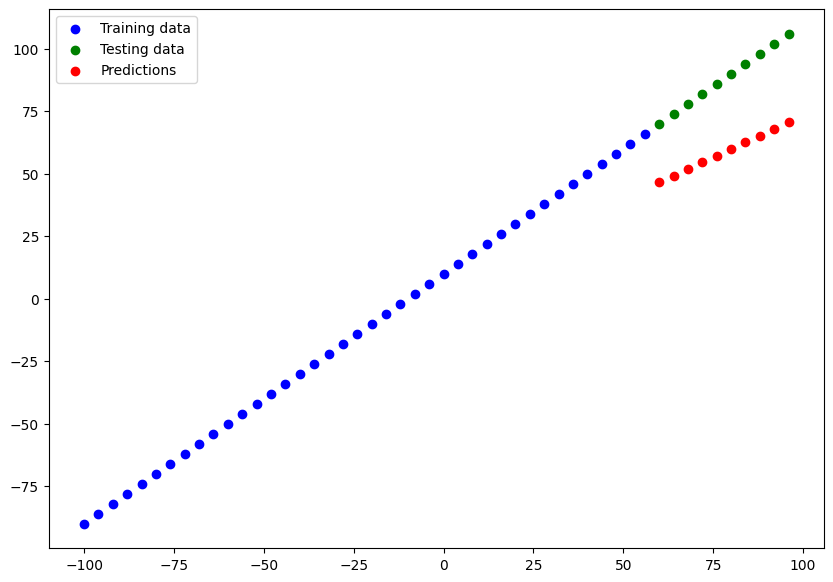

In [ ]:
y_preds_3 = model_3.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=tf.squeeze(y_preds_3))

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(np.float32(29.482983), np.float32(883.92206))

**Build `model_4`**

* 1 layer, trained for 100 epochs using the Adam optimizer



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 72.5765 - mae: 72.5765 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 71.7111 - mae: 71.7111
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 70.8473 - mae: 70.8473
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 69.9836 - mae: 69.9836
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 69.1199 - mae: 69.1199
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 68.2563 - mae: 68.2563
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 67.3926 - mae: 67.3926
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 66.5288 - mae: 66.5288
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 65.6650 - mae: 65.6650
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 64.8011 - mae: 64.8011
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 63.9371 - mae: 63.9371
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 63.0732 - mae: 63.0732
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


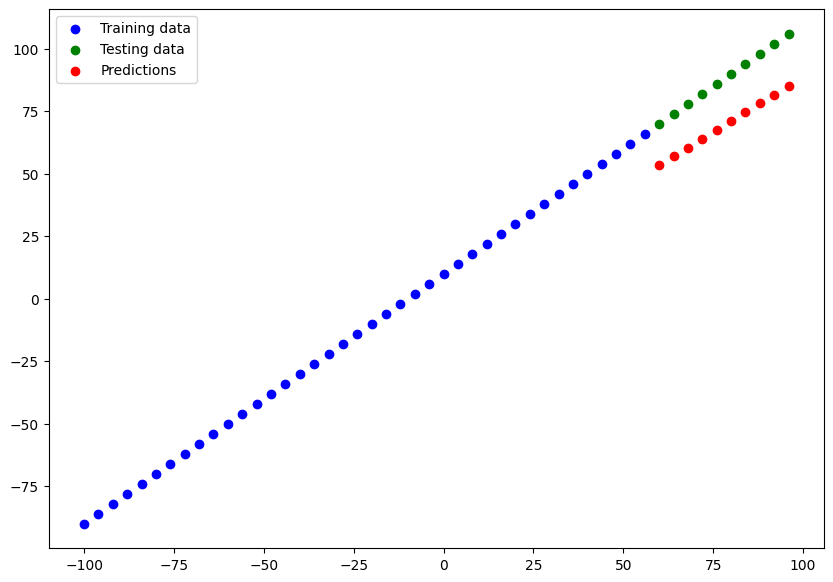

In [ ]:
y_preds_4 = model_4.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=tf.squeeze(y_preds_4))

In [ ]:
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(np.float32(18.682972), np.float32(350.8686))

**Build `model_5`**

* 2 layer, trained for 500 epochs using the Adam optimizer

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit the model
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 41.9486 - mae: 41.9486
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.9211 - mae: 21.9211
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.8173 - mae: 8.8173
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.6907 - mae: 13.6907
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.1358 - mae: 14.1358
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.4871 - mae: 11.4871
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.8037 - mae: 7.8037
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.2117 - mae: 10.2117
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.6394 - mae: 10.6394
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.6776 - mae: 7.6776
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.0149 - mae: 8.0149
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.0615 - mae: 9.0615
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


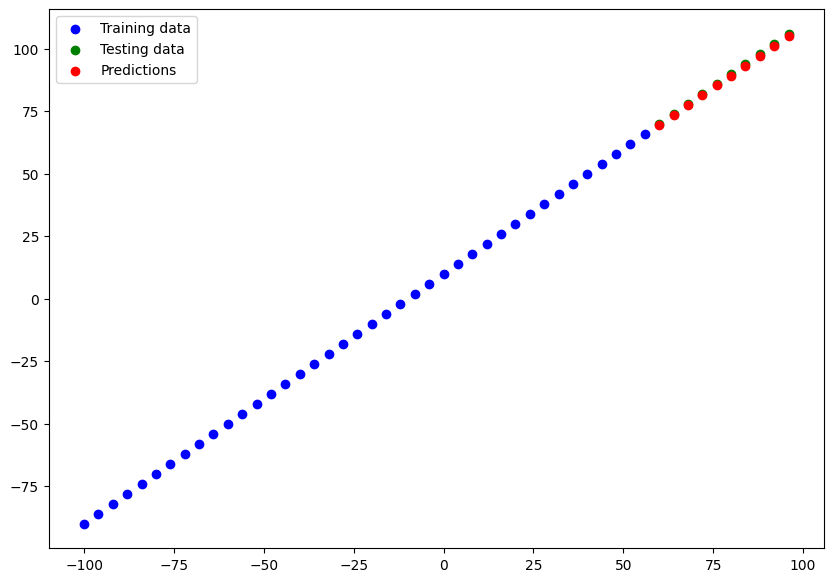

In [ ]:
y_preds_5 = model_5.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=tf.squeeze(y_preds_5))

In [ ]:
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mae_5, mse_5

(np.float32(0.70279235), np.float32(0.50328124))

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments now, let's compare the results

In [ ]:
print(f"Model_1 - MAE: {mae_1}, MSE: {mse_1}")
print(f"Model_2 - MAE: {mae_2}, MSE: {mse_2}")
print(f"Model_3 - MAE: {mae_3}, MSE: {mse_3}")
print(f"Model_4 - MAE: {mae_4}, MSE: {mse_4}")
print(f"Model_5 - MAE: {mae_5}, MSE: {mse_5}")

Model_1 - MAE: 1.3517181873321533, MSE: 2.635570526123047
Model_2 - MAE: 33.0169563293457, MSE: 1103.333740234375
Model_3 - MAE: 29.482982635498047, MSE: 883.9220581054688
Model_4 - MAE: 18.682971954345703, MSE: 350.86859130859375
Model_5 - MAE: 0.7027923464775085, MSE: 0.5032812356948853


In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3],
                 ["model_4", mae_4, mse_4],
                 ["model_5", mae_5, mse_5]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results.sort_values("mae")

,model,mae,mse
4,model_5,0.702792,0.503281
0,model_1,1.351718,2.635571
3,model_4,18.682972,350.868591
2,model_3,29.482983,883.922058
1,model_2,33.016956,1103.333740


In [ ]:
model_5.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are a couple main formats we can save out model's too:

1. The SavedModel format (**legacy**)
2. The HDF5 format (**legacy**)
3. The KERAS format

In [ ]:
# Save model using the SavedModel format
model_5.export("best_model_SavedModel_format")

Saved artifact at 'best_model_SavedModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136647259056528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136647259054416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136647259055568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136647259058448: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Save model using HDF5 format
model_5.save("best_model_HDF5_format.h5")

In [ ]:
# Save model using KERAS format
model_5.save("best_model_KERAS_format.keras")

### Loading in a saved model



In [ ]:
# Load in the SavedModel format model
# loaded_SavedModel_model = tf.saved_model.load("best_model_SavedModel_format")
# loaded_SavedModel_model.summary()

In [ ]:
# Load in the HDF5 format
# loaded_HDF5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
# loaded_HDF5_model.summary()

In [ ]:
# Load in the KERAS format
loaded_KERAS_model = tf.keras.models.load_model("best_model_KERAS_format.keras")
loaded_KERAS_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 604 (2.36 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 303 (1.19 KB)

In [ ]:
# Compare model_5 predictions with keras format model predictions
model_5_preds = model_5.predict(tf.expand_dims(X_test, axis=-1))
keras_model_preds = loaded_KERAS_model.predict(tf.expand_dims(X_test, axis=-1))
model_5_preds == keras_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_5_preds, keras_model_preds

(array([[ 69.448814],
        [ 73.41512 ],
        [ 77.381424],
        [ 81.347755],
        [ 85.31406 ],
        [ 89.28036 ],
        [ 93.24667 ],
        [ 97.21298 ],
        [101.17929 ],
        [105.1456  ]], dtype=float32),
 array([[ 69.448814],
        [ 73.41512 ],
        [ 77.381424],
        [ 81.347755],
        [ 85.31406 ],
        [ 89.28036 ],
        [ 93.24667 ],
        [ 97.21298 ],
        [101.17929 ],
        [105.1456  ]], dtype=float32))

In [ ]:
mae(y_true=y_test, y_pred=model_5_preds) == mae(y_true=y_test, y_pred=keras_model_preds)

np.True_

In [ ]:
model_5_preds.squeeze() == keras_model_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

1. Right click on the file in the files pane and click 'download'.
2. Use the code below.
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_KERAS_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
# !cp best_model_KERAS_format.keras "drive/My Drive/"

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Depended variable is the charges column

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build a neural network (sort of like model_2 above)
# Set random seed
tf.random.set_seed(42)

# Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10239.5391 - mae: 10239.5391
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7631.0093 - mae: 7631.0093 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7999.3467 - mae: 7999.3467 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7344.0933 - mae: 7344.0933 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7284.2993 - mae: 7284.2993 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7334.7329 - mae: 7334.7329 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7566.9897 - mae: 7566.9897 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7716.4917 - mae: 7716.4917 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7256.5747 - mae: 7256.5747 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7427.8428 - mae: 7427.8428 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7278.5322 - mae: 7278.5322 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7751.4888 - mae: 7751.4888  


[7507.30126953125, 7507.30126953125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

In [ ]:
# Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=(["mae"]))

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13255.0088 - mae: 13255.0088
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13048.1250 - mae: 13048.1250
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12659.4062 - mae: 12659.4062
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11918.2510 - mae: 11918.2510
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10711.8457 - mae: 10711.8457
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9228.1201 - mae: 9228.1201
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7949.6016 - mae: 7949.6016
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7431.8154 - mae: 7431.8154
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7365.1836 - mae: 7365.1836
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7341.3579 - mae: 7341.3579
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7318.9087 - mae: 7318.9087
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4691.6318 - mae: 4691.6318  


[4569.33203125, 4569.33203125]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13284.5703 - mae: 13284.5703
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13162.9561 - mae: 13162.9561
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12919.2236 - mae: 12919.2236
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12412.3828 - mae: 12412.3828
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11486.1973 - mae: 11486.1973
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10126.6914 - mae: 10126.6914
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8666.3506 - mae: 8666.3506
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7660.2344 - mae: 7660.2344
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7424.2080 - mae: 7424.2080
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7388.3364 - mae: 7388.3364
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7366.9146 - mae: 7366.9146
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluate our thrid model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3471.1387 - mae: 3471.1387  


[3404.234619140625, 3404.234619140625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7751.4888 - mae: 7751.4888 


[7507.30126953125, 7507.30126953125]

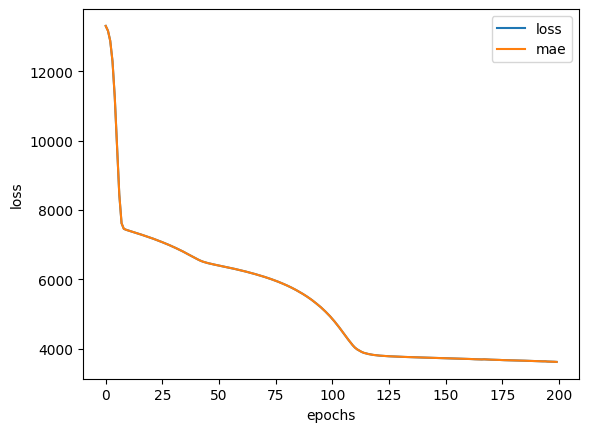

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

> 🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.


## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[42]


array([0.36956522, 0.31584611, 0.6       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautifull! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)



Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13297.4941 - mae: 13297.4941
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13290.5938 - mae: 13290.5938
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13273.0283 - mae: 13273.0283
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13233.8232 - mae: 13233.8232
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13161.1582 - mae: 13161.1582
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13043.6211 - mae: 13043.6211
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12870.9072 - mae: 12870.9072
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12633.1162 - mae: 12633.1162
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12320.5703 - mae: 12320.5703
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11926.7002 - mae: 11926.7002
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11458.1670 - mae: 11458.1670
Epoch 12/100
34/34 ━━━━━━━━━━━

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3514.4526 - mae: 3514.4526


[3428.77294921875, 3428.77294921875]

In [ ]:
# Insurance model 2 results
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4691.6318 - mae: 4691.6318